In [55]:
import numpy as np
import matplotlib.pyplot as plt
import math
import common as cm

This exercise consists of only one part.

# A-star algorithm

The task of the A-star algorithm is to find the shortest path between two nodes in the graph. This algorithm is often used to find the shortest path on a 2d map. In this case, nodes are different possible positions (fields), and edges from node in the graph lead to adjacent fields. See the example map below:

(0, 7) (9, 0)


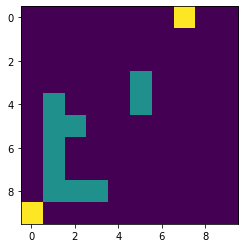

In [56]:
position_start, position_target, terrain  = cm.getSmallExample()
### THE NEXT 2 LINES: OVERRIDE SOME CELLS IN THE MATRIX TO SHOW START/STOP LOCATIONS
terrain[position_start[0]][position_start[1]] = 2 ### START
terrain[position_target[0]][position_target[1]] = 2 ### TARGER
### CYAN LOCATIONS = OBSTACLES
plt.imshow(terrain) 
print(str(position_start) + " " + str(position_target))

You can consider even bigger case:

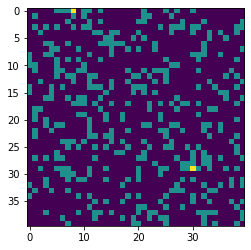

In [57]:
position_start, position_target, terrain  = cm.getBigExample()
terrain[position_start[0]][position_start[1]] = 2 ### START
terrain[position_target[0]][position_target[1]] = 2 ### START
plt.imshow(terrain) 

There are various possible moves depending on different neighbourhood models and the different cost values for each move.

In [58]:
possible_moves = [(i-1,j-1) for i in range(3) for j in range(3) if i !=1 or j !=1]
#possible_moves = [(0,1),(1,0),(0,-1),(-1,0)]
#possible_moves = [(1,2),(2,1),(1,-2),(-2,1),(-1,2),(2,-1),(-1,-2),(-2,-1)]
# print(possible_moves)

In [59]:
possible_moves_costs = [math.sqrt(abs(i)+abs(j)) for i,j in possible_moves]
#possible_moves_costs = [0.5+(abs(i)+abs(j))/2 for i,j in possible_moves]
# print(possible_moves_costs)

In this task, we will use the node class, which will store references to the node from which we came (parent) positions, and the g (actual cost from the beginning of the path to this node) and f (estimated path length passing through this node).

1.1) Complete the function estimatePathLenght calculating the value of f, based on the actual distance of the node from the source g and the Euclidean distance to the target h.

In [60]:
def getEuclideanDistance(A, B):
    dim = len(A)
    if dim != len(B):
        raise Exception("different dimensions")

    sum = 0
    for i in range(dim):
        sum += (A[i] - B[i])**2
    return np.sqrt(sum)

In [61]:
class Node():
    def __init__(self, parent, position):
        self.parent = parent # a reference to the previous (parent) node in the path
        self.position = position # node's (x, y) position in the map       
        self.g = 0 # g is the actual cost from the source to the node,
        self.f = 0 # f is the estimation of the length of the path from the source to the target, 
                   # passing through the node (i.e., g(x) + h(x)).
        self.step = 0 # it says in which step the node was created (visited).
        
    def __eq__(self, other): ### to check whether two nodes are equal, i.e., takes the same positions
        return self.position == other.position 
    
    def updateG(self, cost): ### update the cost based on its parent's cost. 
        self.g = self.parent.g + cost        
        
    def GetPath(self): ### get a path (list of positions) from the source to this node
                       ### this is a recusive method calling self.parent.getPath()
        if self.parent is None:
            return [self.position]
        else:
            return self.parent.GetPath() + [self.position]
        
    def estimatePathLenght(self, target):      
        #TODO
        self.h = getEuclideanDistance(self.position,target.position)
        self.f = self.g + self.h


Then there is a function that checks whether a given position is correct, not out of range, and whether it is an obstacle.

In [62]:
def validPosition(position, terrain):
    if position[0]<0 or position[1]<0 or position[0]>=terrain.shape[0] or position[1]>=terrain.shape[1]:
        return False
    if  terrain[position] == 1:
        return False
    return True

1.2) Complete the function calculating the shortest path using the A * algorithm. 

1) To do this, find all neighbours positions for the considered node, then check that the position is correct. <br>
2) If so, create a new node (child/neighbour) which parent is the node being considered.<br>
3) Calculate the child's g value using the cost of transition from node to child.<br>
4) Check if the child node has already been visited (closed set).<br>
5) If not then check if there is a node on the open set (unvisited) with the same position but a smaller g-value (it's closer to the source).<br>
6) If not, calculate the estimated distance from source to destination through the child and add this node to the list to check.<br>
7) After generating all adjacent nodes, sort the open set list so that the next considered node has the smallest f value.<br>

The algorithm returns a node whose position is the same as the target position and which stores the entire path through the parent field.

In [63]:
def A_star(terrain, position_start, position_target, possible_moves, possible_moves_costs):
    root = Node(None, position_start) ### THE SOURCE NODE
    target = Node(None,position_target) ### THE TARGET NODE
    
    closed_set = [] # visited 
    open_set = [] 
    open_set.append(root)
    ### Assume that open_set (nodes to be potentially visited) is kept sorted 
    ### according to node's f score (the lower the better). In each iteration, 
    ### the best node is popped from the queue. 
    step = 0 ### This is the first iteration
    root.step = step 
    while(len(open_set)>0):
        ### TODO you can follow the hints or you can write your own version
        node = open_set.pop()
        closed_set.append(node)
        step+=1
        node.step = step
        if node == target:
            return node,closed_set
        #TODO
        for moves in zip(possible_moves,possible_moves_costs): # Iterate over all possible moves and their costs (you can use zip in the for loop)
            child_position = list(node.position)### 1. create the child node position 
            child_position[0] += moves[0][0] # using the original node's position + move
            child_position[1] += moves[0][1]
            if not validPosition(tuple(child_position), terrain):### 2. If the child's position is not valid, than ignore this child node
                continue
            new_node = Node(node,tuple(child_position))### 3. Create child node and update its cost  (updateG)
            new_node.updateG(moves[1])
            bol = False
            for z in range(len(closed_set)): ### 4. If there exists the same node in closed_set then ignore this child node
                if new_node.position == closed_set[z].position:
                    bol = True
                    break
            if bol:
                continue
            bol = False # if there is a node on the open set (unvisited) with the same position but a smaller g-value 
        ### 5. If there exists the same node node in open_set with better score (check .g score), then ignore this child node
            delete_list = []
            for j in range(len(open_set)):
                if new_node.position == open_set[j].position:
                    if new_node.g > open_set[j].g:
                        bol = True
                        break
                    else:
                        delete_list.append(j)  ### However, if child is better than some node in open_set, remove the worse 
                                         ### (check .g score) node from the open_set
            for x in range(len(delete_list)):
                open_set.pop(delete_list[x])
            if bol:
                continue
            new_node.estimatePathLenght(target) ### 6. If the child node passed all tests,  then calcluate estimatePathLenght of node.
            open_set.append(new_node)
            open_set.sort(key=lambda x: x.f, reverse = True)
                    ### 7. The child node can be added to open_set (remember to sort open_set accord to f score)

1.3) Find the shortest path for "small example":

In [64]:
position_start, position_target, terrain  = cm.getSmallExample()

Show terrain<br>
1 means wall, and 0 empty fields.

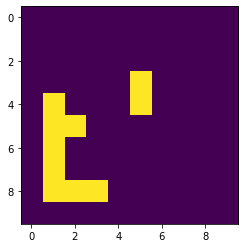

In [65]:
plt.imshow(terrain)

Run A star algorithm

In [66]:
path,closed_set = A_star(terrain, position_start, position_target, possible_moves, possible_moves_costs)
print(path.g) 
print(path.step)

13.65685424949238
51


Plot path

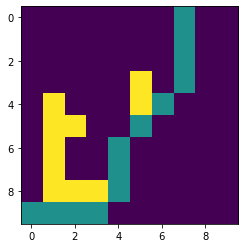

In [67]:
cm.plotPath(terrain, path)

Plot closed_set where colors indicate the number of the last iteration in which the node was checked.

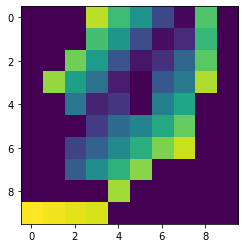

In [68]:
cm.plotSteps(terrain, closed_set)

1.4) Find the shortest path for the "big example":

In [69]:
position_start, position_target, terrain  = cm.getBigExample()

In [70]:
path,closed_set = A_star(terrain, position_start, position_target, possible_moves, possible_moves_costs)
print(path.g)
print(path.step)

40.11269837220809
262


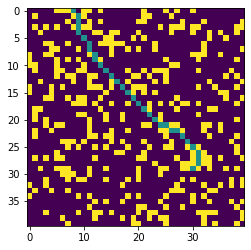

In [71]:
cm.plotPath(terrain, path)

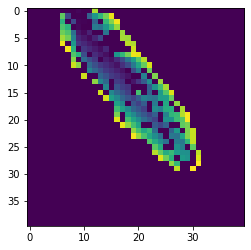

In [72]:
cm.plotSteps(terrain,closed_set)